In [32]:
# System things
import os

# Data manipulation
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Read in data

In [33]:
raw_data = pd.read_csv('../data/03_analytic/clean_data.csv').drop(['Unnamed: 0'], axis=1)
data = raw_data.copy()
data.describe()

Status  Progress  Duration (in seconds)  Finished  credential  \
count    44.0      44.0              44.000000      44.0   43.000000   
mean      0.0     100.0             944.409091       1.0    4.348837   
std       0.0       0.0             640.976773       0.0    1.702711   
min       0.0     100.0             270.000000       1.0    1.000000   
25%       0.0     100.0             601.750000       1.0    3.000000   
50%       0.0     100.0             846.000000       1.0    5.000000   
75%       0.0     100.0            1002.500000       1.0    6.000000   
max       0.0     100.0            4018.000000       1.0    6.000000   

       years_experience_aba        age     gender  low_low_low_low  \
count             44.000000  43.000000  44.000000        44.000000   
mean               4.659091  34.139535   1.681818         1.409091   
std                7.451216  10.176026   0.471155         0.497350   
min                0.000000  19.000000   1.000000         1.000000   
25%                0.000000  26.500000   1.000000         1.000000   
50%                1.000000  34.000000   2.000000         1.000000   
75%                6.125000  40.000000   2.000000         2.000000   
max               30.000000  67.000000   2.000000         2.000000   

       low_low_med_low  low_low_high_low  low_low_low_med  low_low_med_med  \
count        44.000000         44.000000        44.000000        44.000000   
mean          1.431818          1.340909         1.272727         1.272727   
std           0.501056          0.479495         0.450511         0.450511   
min           1.000000          1.000000         1.000000         1.000000   
25%           1.000000          1.000000         1.000000         1.000000   
50%           1.000000          1.000000         1.000000         1.000000   
75%           2.000000          2.000000         2.000000         2.000000   
max           2.000000          2.000000         2.000000         2.000000   

       low_low_high_med  low_low_low_high  low_low_med_high  \
count         44.000000         44.000000         43.000000   
mean           1.227273          1.250000          1.255814   
std            0.423915          0.438019          0.441481   
min            1.000000          1.000000          1.000000   
25%            1.000000          1.000000          1.000000   
50%            1.000000          1.000000          1.000000   
75%            1.000000          1.250000          1.500000   
max            2.000000          2.000000          2.000000   

       low_low_high_high  low_med_low_low  low_med_med_low  low_med_high_low  \
count          44.000000        44.000000        44.000000         44.000000   
mean            1.272727         1.772727         1.750000          1.704545   
std             0.450511         0.423915         0.438019          0.461522   
min             1.000000         1.000000         1.000000          1.000000   
25%             1.000000         2.000000         1.750000          1.000000   
50%             1.000000         2.000000         2.000000          2.000000   
75%             2.000000         2.000000         2.000000          2.000000   
max             2.000000         2.000000         2.000000          2.000000   

       low_med_low_med  low_med_med_med  low_med_high_med  low_med_low_high  \
count        44.000000        44.000000         44.000000         44.000000   
mean          1.568182         1.500000          1.431818          1.386364   
std           0.501056         0.505781          0.501056          0.492545   
min           1.000000         1.000000          1.000000          1.000000   
25%           1.000000         1.000000          1.000000          1.000000   
50%           2.000000         1.500000          1.000000          1.000000   
75%           2.000000         2.000000          2.000000          2.000000   
max           2.000000         2.000000          2.000000          2.000000   

       low_med_med_high

# Look at initial differences across questions

In [44]:
# Prep dataframe
plot_df = data[[col for col in list(data) if (col.startswith("low_")) or (col.startswith("med_")) or (col.startswith("high_")) or (col=='source')]]
plot_df = plot_df.melt(id_vars='source')
plot_df.columns=['source', 'scenario', 'choice']
plot_df[::300]

source           scenario  choice
0     bx_analyst    low_low_low_low     1.0
300      gen_pop   low_low_low_high     1.0
600      gen_pop    low_med_med_med     2.0
900      gen_pop  low_high_high_low     2.0
1200  bx_analyst  low_low_low_low.1     2.0
1500  bx_analyst   med_low_med_high     1.0
1800     gen_pop    med_med_med_med     2.0
2100     gen_pop  med_high_high_low     2.0
2400     gen_pop   high_low_low_low     1.0
2700     gen_pop  high_low_med_high     2.0
3000  bx_analyst  high_med_high_med     2.0
3300  bx_analyst  high_high_low_med     1.0

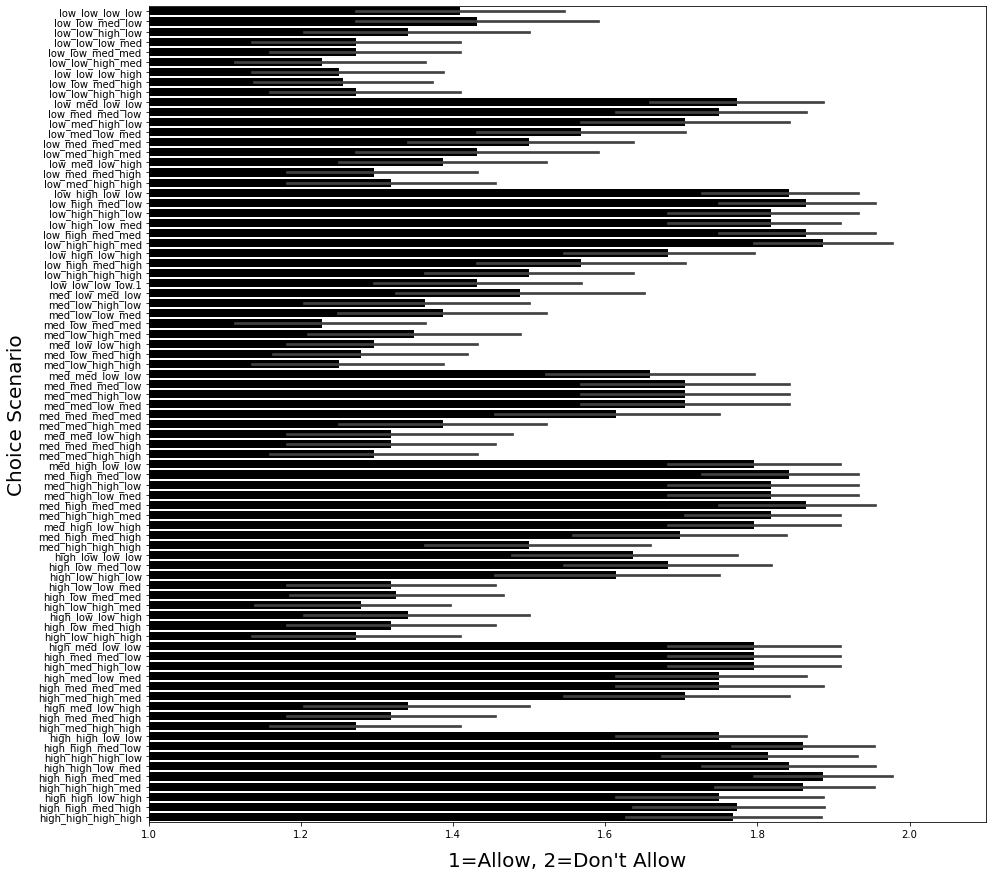

In [45]:
# All conditions all respondents
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(y='scenario', x='choice', data=plot_df, color='k')
plt.ylabel("Choice Scenario", fontsize=20, labelpad=12)
plt.xlim(1, 2.1)
plt.xlabel("1=Allow, 2=Don't Allow", fontsize=20, labelpad=12)
plt.show()

In [46]:
# Make the long df easier to groupby different choice scenario characteristics
choice_char = []

for i in range(len(plot_df)):
    val = plot_df['scenario'][i].split("_")
    choice_char.append(val)

choice_char = pd.DataFrame(choice_char)
choice_char.columns = ['first_tele', 'first_harm', 'sec_tele', 'sec_harm']

plot_df = pd.concat([plot_df, choice_char], axis=1)
plot_df
plot_df

source             scenario  choice first_tele first_harm sec_tele  \
0     bx_analyst      low_low_low_low     1.0        low        low      low   
1     bx_analyst      low_low_low_low     1.0        low        low      low   
2     bx_analyst      low_low_low_low     1.0        low        low      low   
3     bx_analyst      low_low_low_low     1.0        low        low      low   
4     bx_analyst      low_low_low_low     1.0        low        low      low   
...          ...                  ...     ...        ...        ...      ...   
3559     gen_pop  high_high_high_high     2.0       high       high     high   
3560     gen_pop  high_high_high_high     2.0       high       high     high   
3561     gen_pop  high_high_high_high     2.0       high       high     high   
3562     gen_pop  high_high_high_high     2.0       high       high     high   
3563     gen_pop  high_high_high_high     2.0       high       high     high   

     sec_harm  
0         low  
1         low  
2         low  
3         low  
4         low  
...       ...  
3559     high  
3560     high  
3561     high  
3562     high  
3563     high  

[3564 rows x 7 columns]

In [47]:
plot_df = plot_df.replace('low.1', 'low')

# Plots of main effects

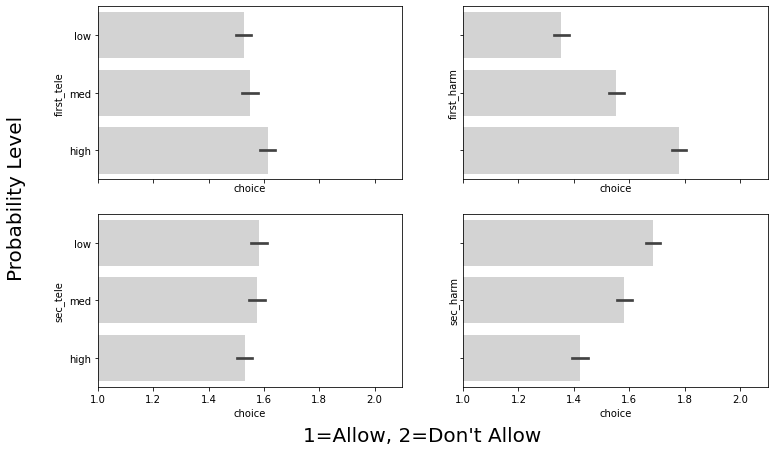

In [61]:
# Choice scenario characteristics
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 7), sharex=True, sharey=True)
sns.barplot(ax=ax[0, 0], y='first_tele', x='choice', data=plot_df, color='lightgray')
sns.barplot(ax=ax[0, 1], y='first_harm', x='choice', data=plot_df, color='lightgray')
sns.barplot(ax=ax[1, 0], y='sec_tele', x='choice', data=plot_df, color='lightgray')
sns.barplot(ax=ax[1, 1], y='sec_harm', x='choice', data=plot_df, color='lightgray')
fig.supylabel("Probability Level", fontsize=20)
fig.supxlabel("1=Allow, 2=Don't Allow", fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 2.1)
plt.show()

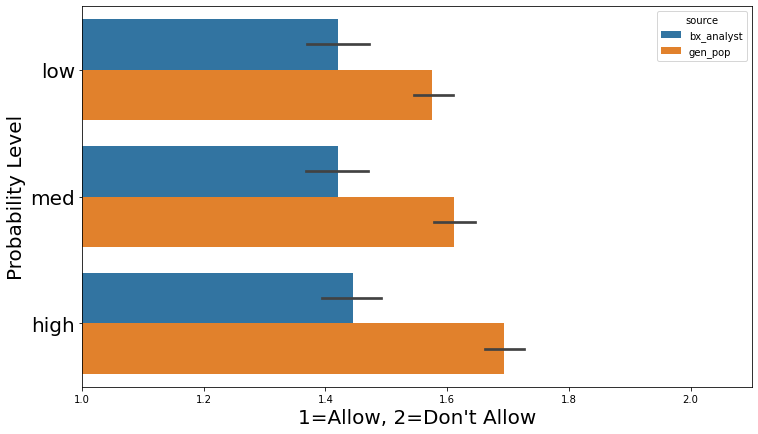

In [63]:
# Choice scenario characteristics
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(y='first_tele', x='choice', data=plot_df, hue='source')
plt.ylabel("Probability Level", fontsize=20)
plt.xlabel("1=Allow, 2=Don't Allow", fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 2.1)
plt.show()